### Importing necessary libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Importing the needed dataset

In [8]:
df = pd.read_excel('ENB2012_data.xlsx')

# Exploratory Data Analysis

In [11]:
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [15]:
df.shape

(768, 10)

In [17]:
#Checking if there are any missing values within the data
df.isna()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False,False


In [19]:
#Just to make sure that there are no missing values within the data
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [21]:
#Check if there are any duplicates within the dataset
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [1970]:
#Looks like the variables in the table have been named from X1-X8, and Y1-Y2,
#but on the source where the dataset has been retrieved, there are discriptions of what those
#X and Y are, so the best thing to do would be to rename those variables, where X1 to X8
#are seen as features, while Y1 and Y2 are seen as targets when it comes to their roles. 
#Additionally, the best thing would also be to rename the variables without spaces.

In [23]:
df.rename(columns = {
                    'X1': 'relative_compactness',
                    'X2': 'surface_area',
                    'X3': 'wall_area', 
                    'X4': 'roof_area',
                    'X5': 'overall_height',
                    'X6': 'orientation',
                    'X7': 'glazing_area',
                    'X8': 'glazing_area_distribution',
                    'Y1': 'heating_load',
                    'Y2': 'cooling_load'
                    }, inplace = True)

In [25]:
df.head(10)

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [1976]:
#To understand the distribution of the variables, visualizations of the distributions are made
#The ones that are colored as blue are features, and the red ones are the targets/responses
#down below with visualizations such as boxplots, pairplots, and histplots.

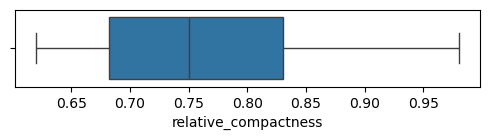

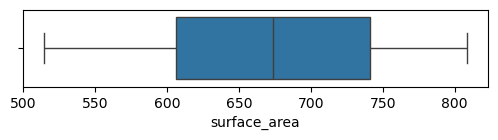

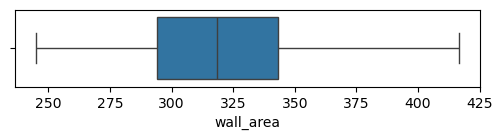

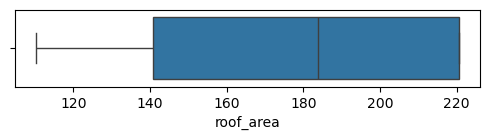

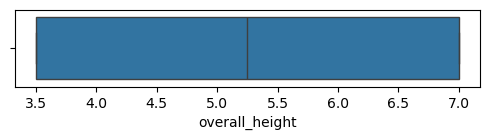

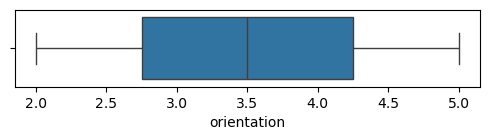

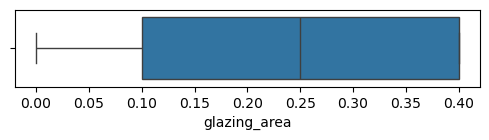

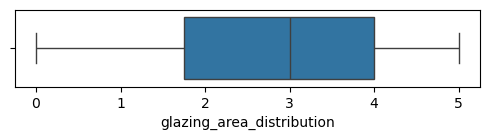

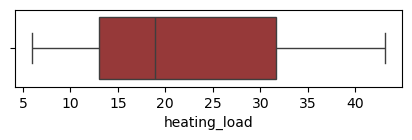

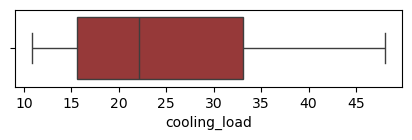

In [27]:
plt.figure(figsize = (6,1))
sns.boxplot(data = df, x = 'relative_compactness')
plt.figure(figsize = (6,1))
sns.boxplot(data = df, x = 'surface_area')
plt.figure(figsize = (6,1))
sns.boxplot(data = df, x = 'wall_area')
plt.figure(figsize = (6,1))
sns.boxplot(data = df, x = 'roof_area')
plt.figure(figsize = (6,1))
sns.boxplot(data = df, x = 'overall_height')
plt.figure(figsize = (6,1))
sns.boxplot(data = df, x = 'orientation')
plt.figure(figsize = (6,1))
sns.boxplot(data = df, x = 'glazing_area')
plt.figure(figsize = (6,1))
sns.boxplot(data = df, x = 'glazing_area_distribution')
plt.figure(figsize = (5,1))
sns.boxplot(data = df, x = 'heating_load', color = 'brown')
plt.figure(figsize = (5,1))
sns.boxplot(data = df, x = 'cooling_load', color = 'brown')
plt.show()

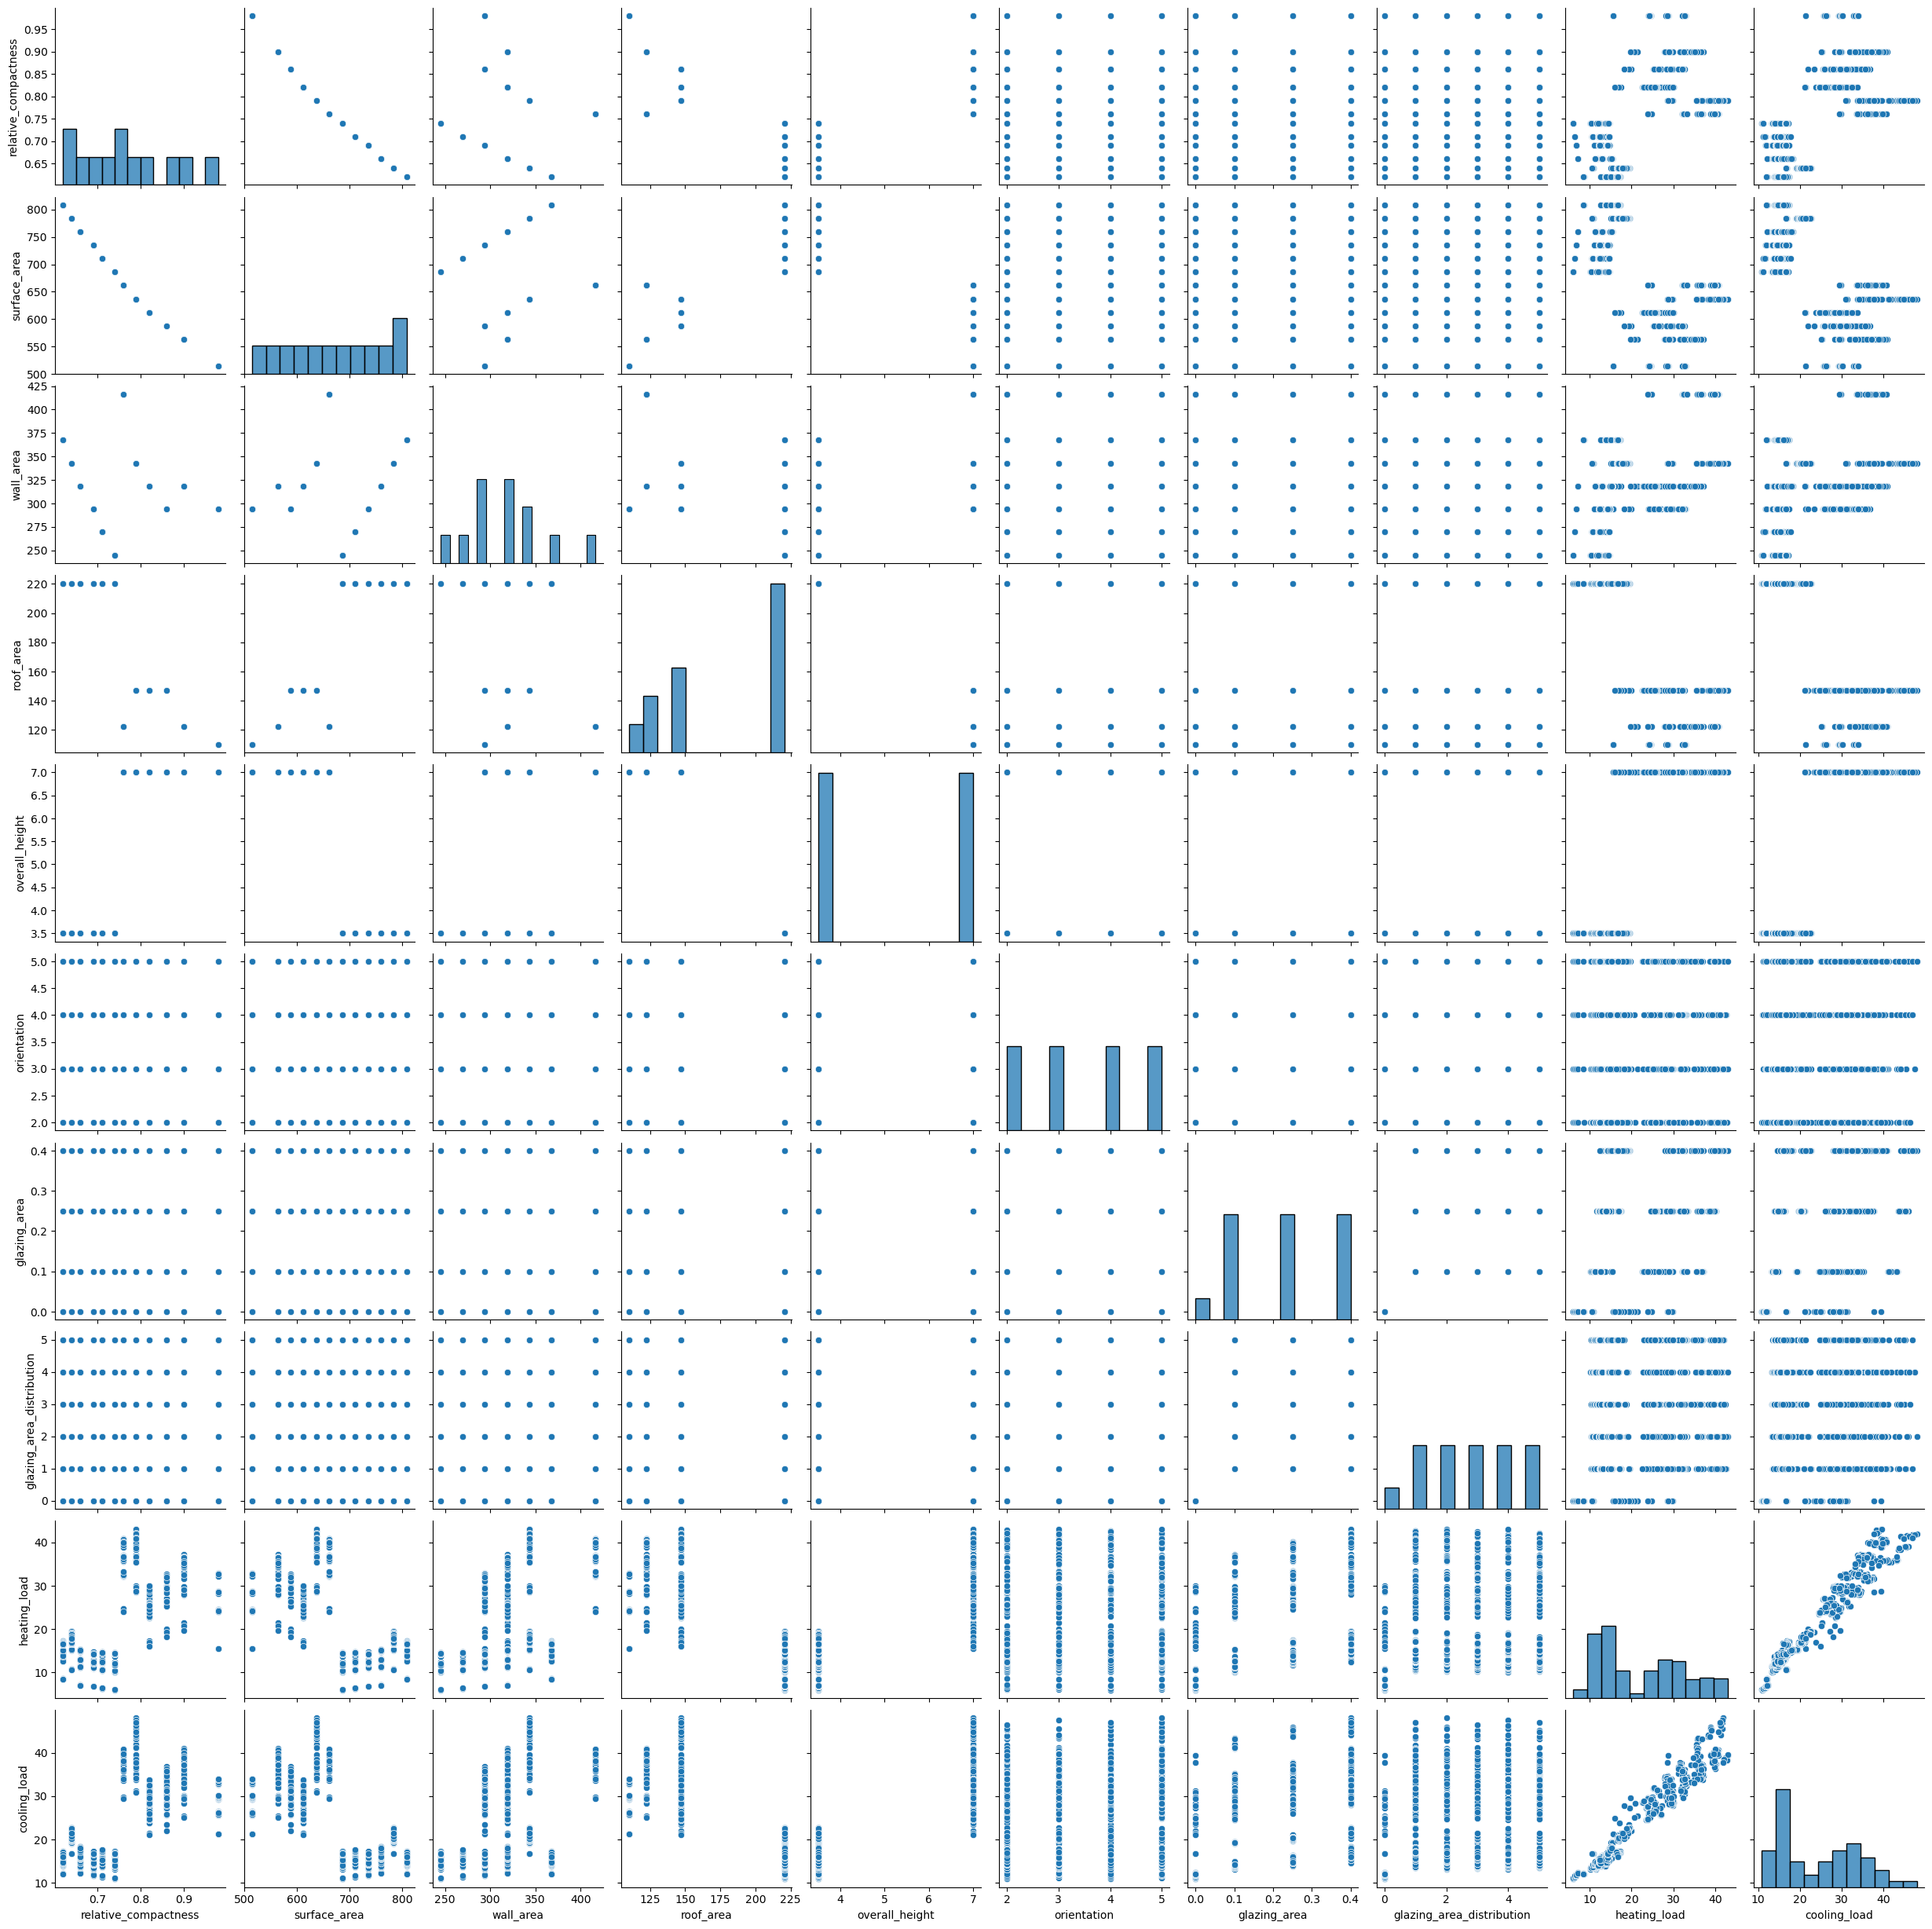

In [29]:
#Looking after relationships among the variables that exist within the dataset
sns.pairplot(data = df)

<Axes: xlabel='cooling_load', ylabel='Count'>

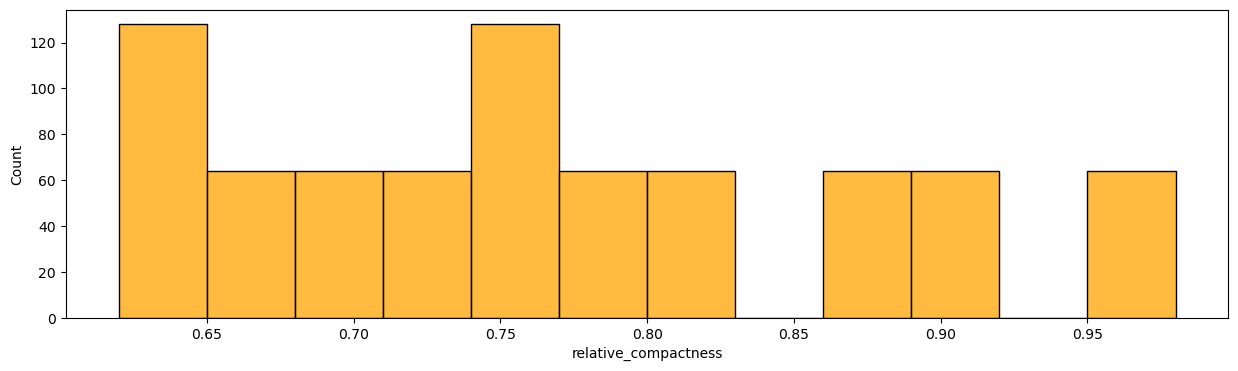

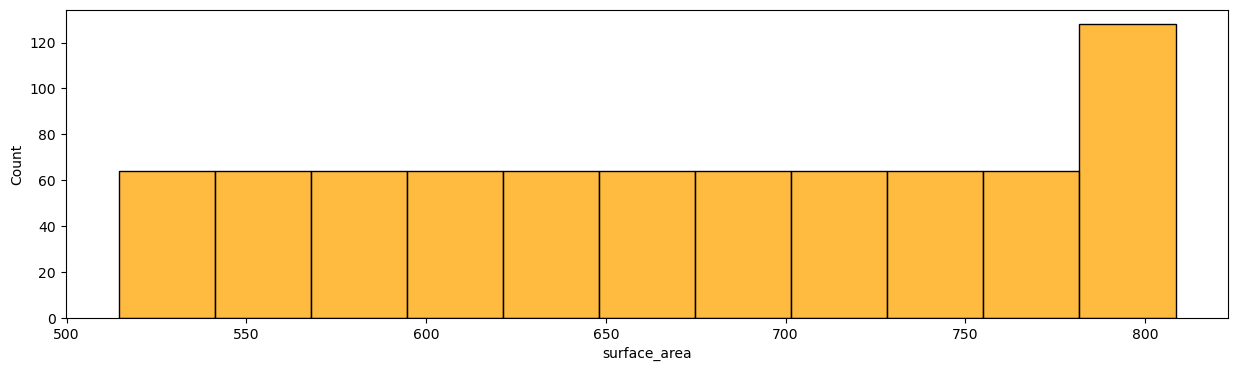

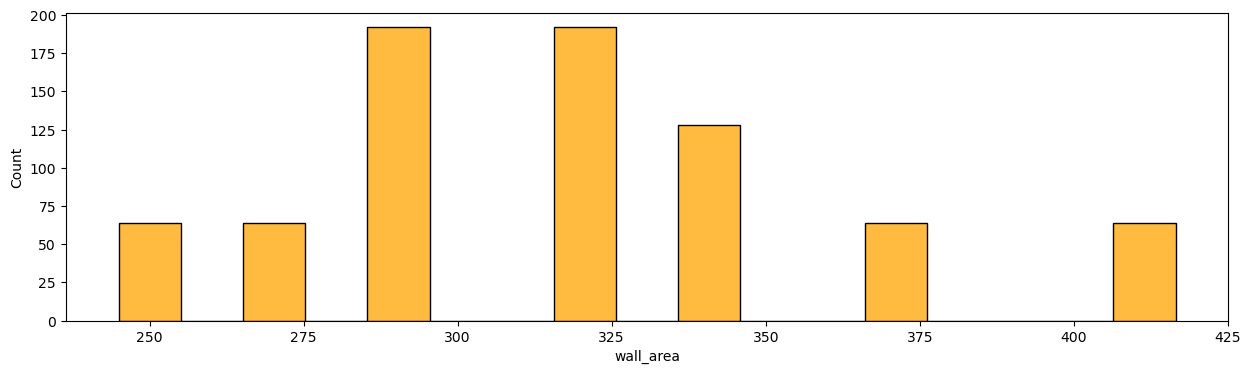

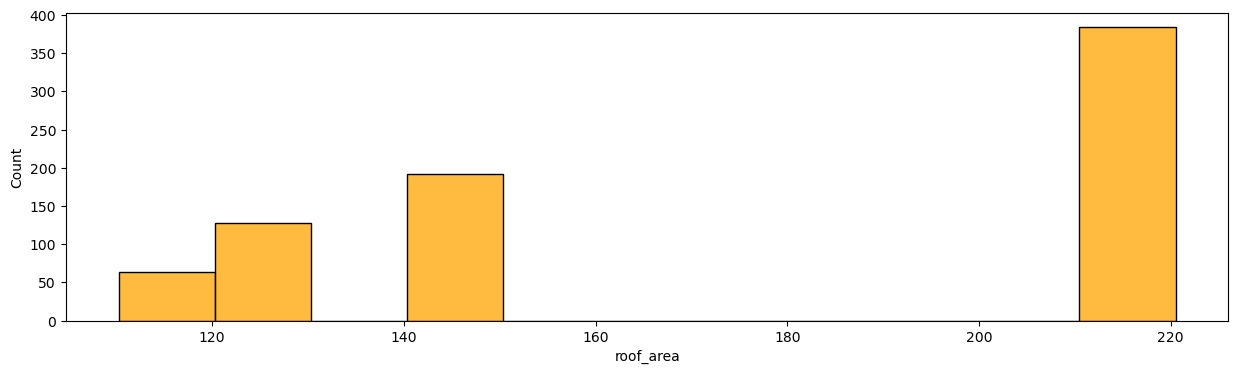

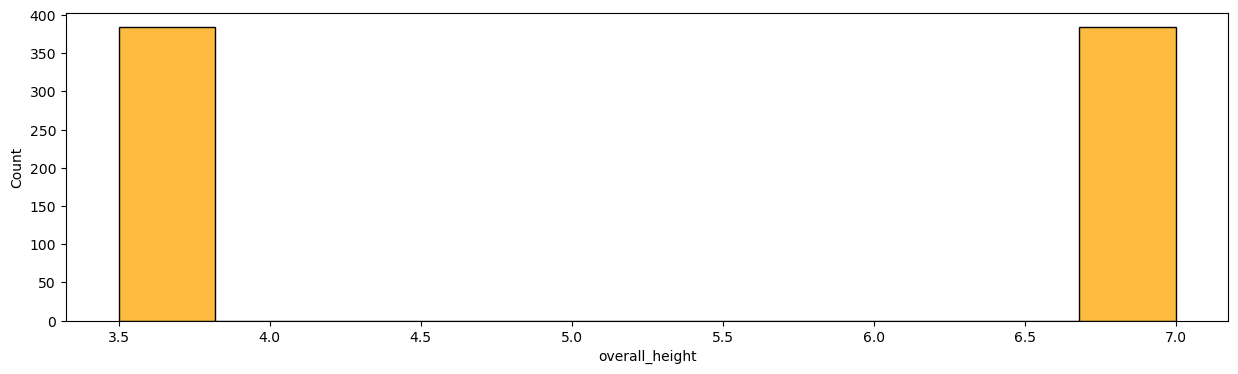

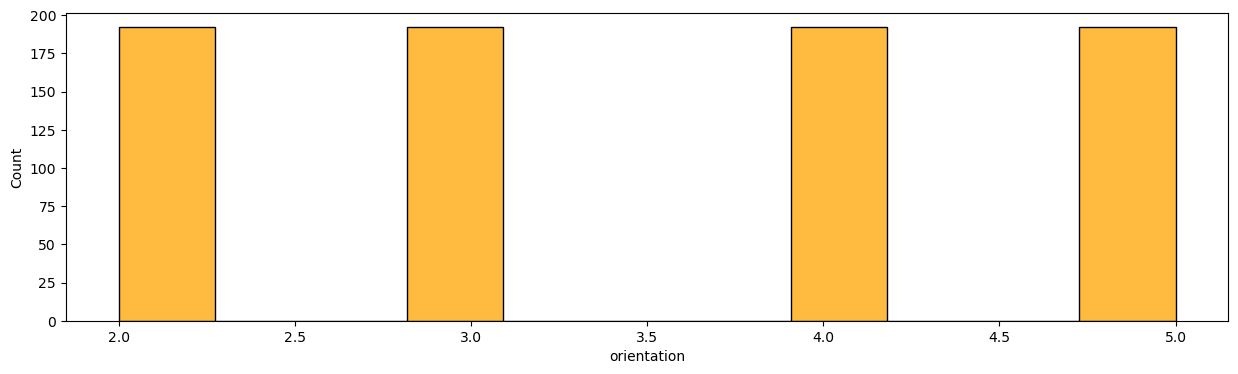

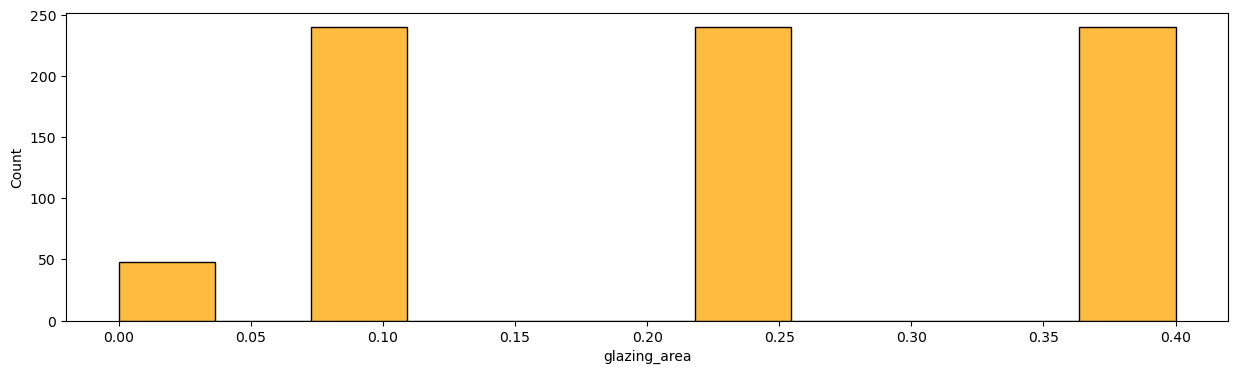

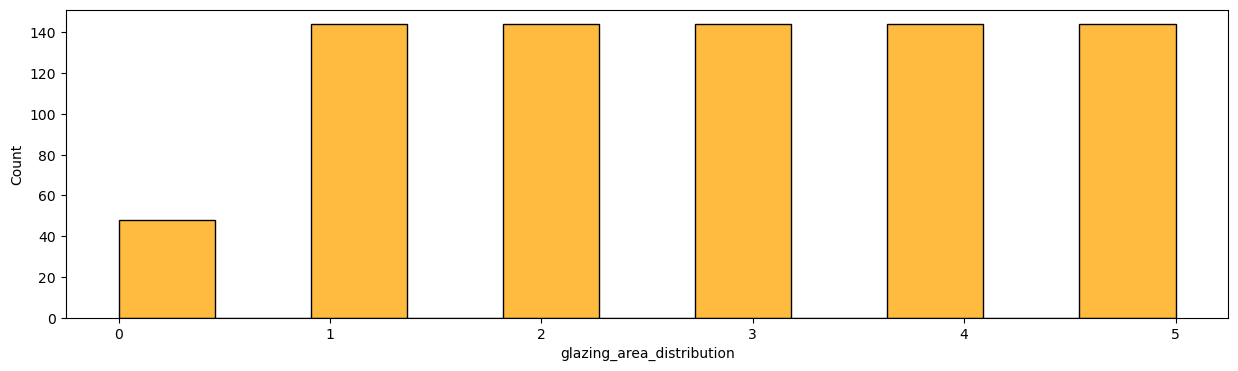

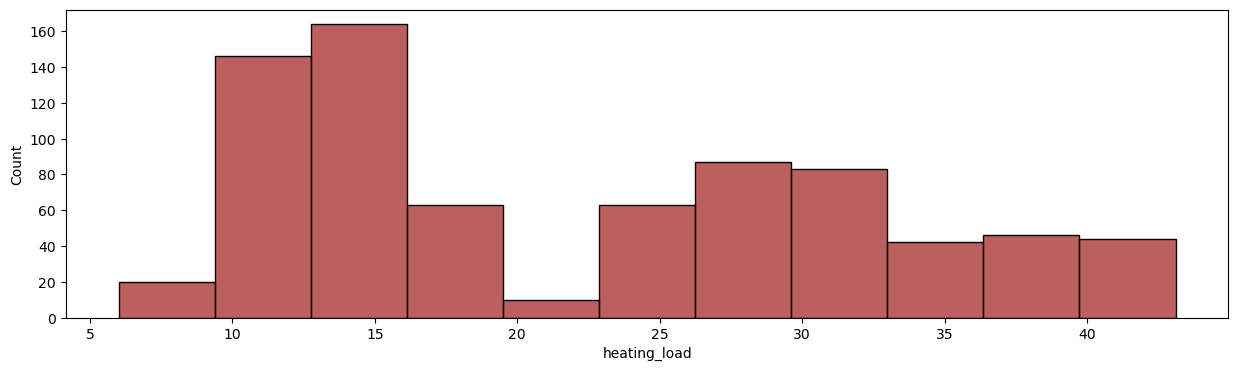

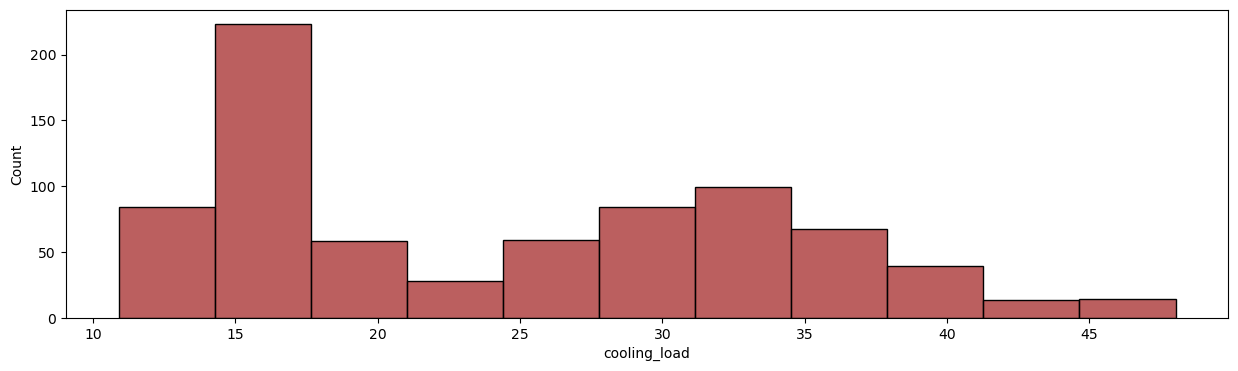

In [31]:
plt.figure(figsize = (15,4))
sns.histplot(data = df, x = 'relative_compactness', color = 'orange')
plt.figure(figsize = (15,4))
sns.histplot(data = df, x = 'surface_area', color = 'orange')
plt.figure(figsize = (15,4))
sns.histplot(data = df, x = 'wall_area', color = 'orange')
plt.figure(figsize = (15,4))
sns.histplot(data = df, x = 'roof_area', color = 'orange')
plt.figure(figsize = (15,4))
sns.histplot(data = df, x = 'overall_height', color = 'orange')
plt.figure(figsize = (15,4))
sns.histplot(data = df, x = 'orientation', color = 'orange')
plt.figure(figsize = (15,4))
sns.histplot(data = df, x = 'glazing_area', color = 'orange')
plt.figure(figsize = (15,4))
sns.histplot(data = df, x = 'glazing_area_distribution', color = 'orange')
plt.figure(figsize = (15,4))
sns.histplot(data = df, x = 'heating_load', color = 'brown')
plt.figure(figsize = (15,4))
sns.histplot(data = df, x = 'cooling_load', color = 'brown')

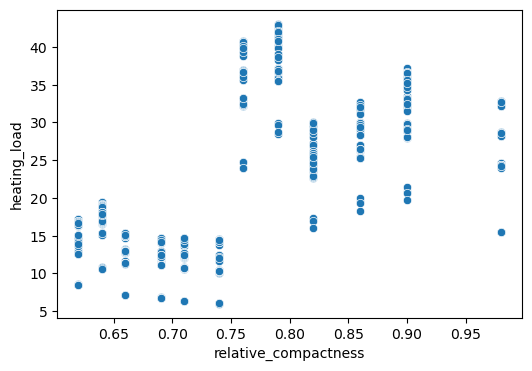

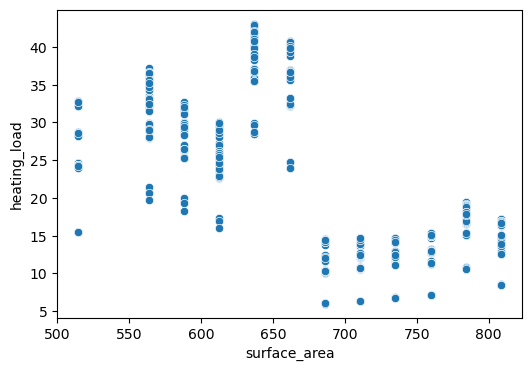

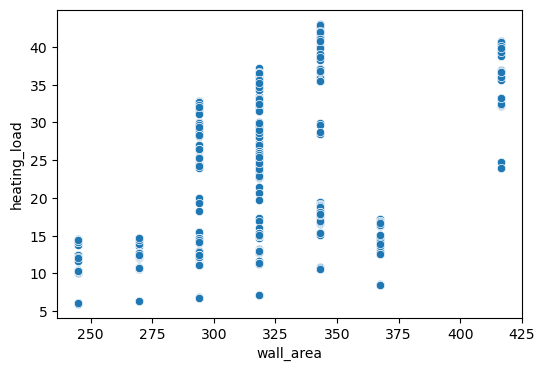

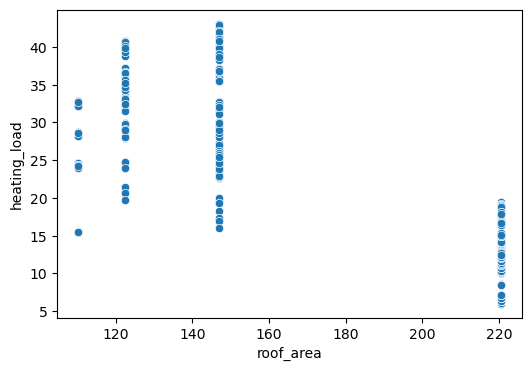

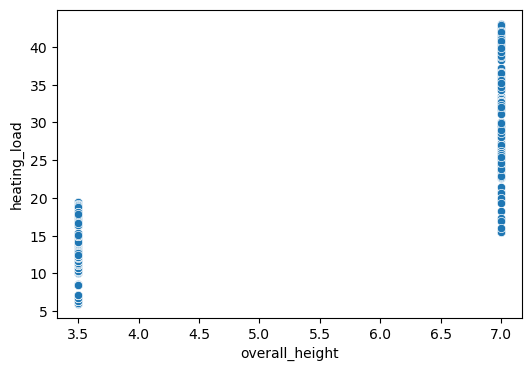

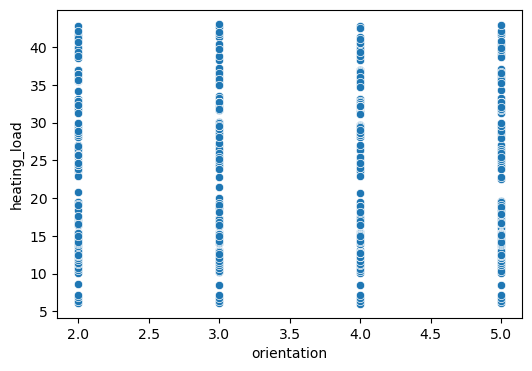

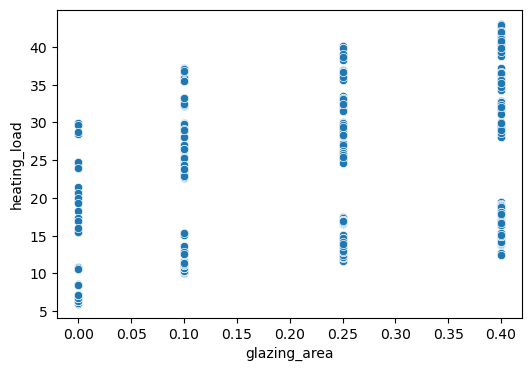

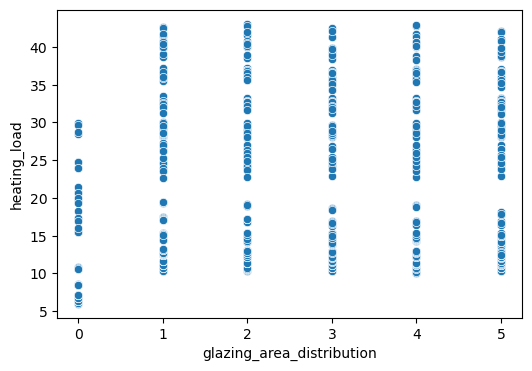

In [33]:
#Relationships between the feature variables and the target variable 

plt.figure(figsize = (6,4))
sns.scatterplot(x = 'relative_compactness', y = 'heating_load', data = df)
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'surface_area', y = 'heating_load', data = df)
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'wall_area', y = 'heating_load', data = df)
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'roof_area', y = 'heating_load', data = df)
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'overall_height', y = 'heating_load', data = df)
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'orientation', y = 'heating_load', data = df)
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'glazing_area', y = 'heating_load', data = df)
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'glazing_area_distribution', y = 'heating_load', data = df)
plt.show()

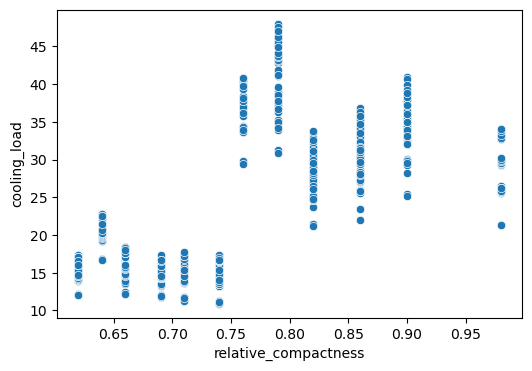

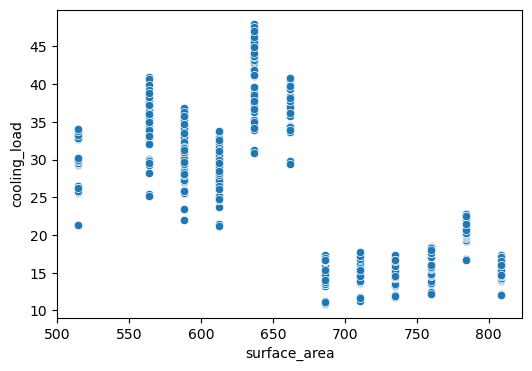

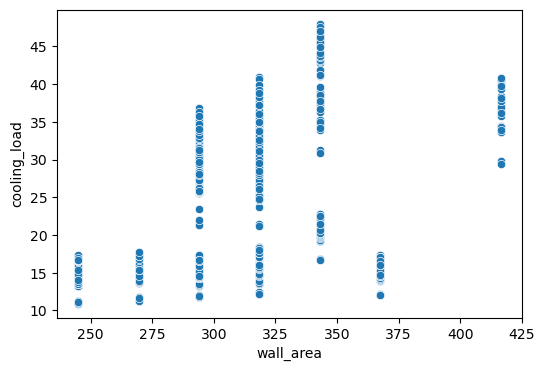

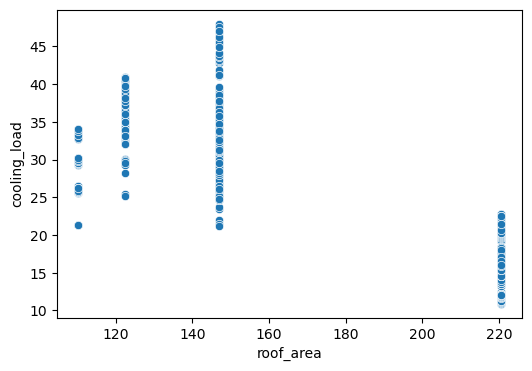

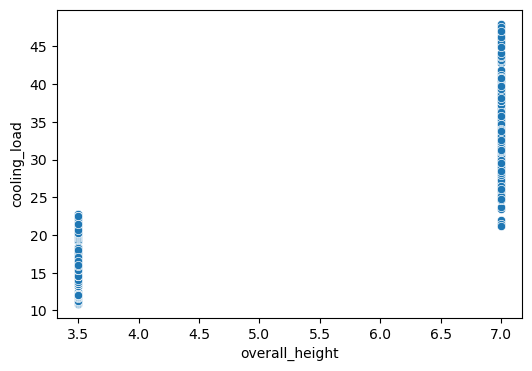

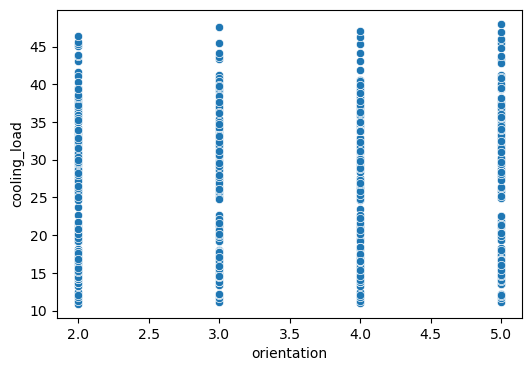

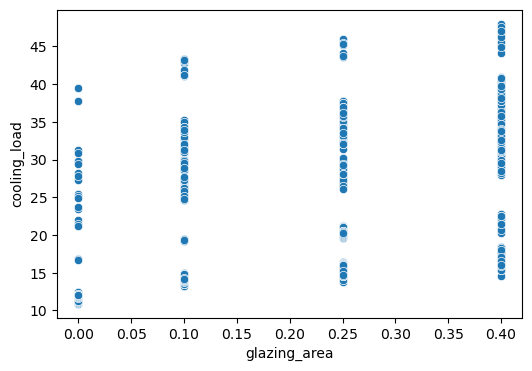

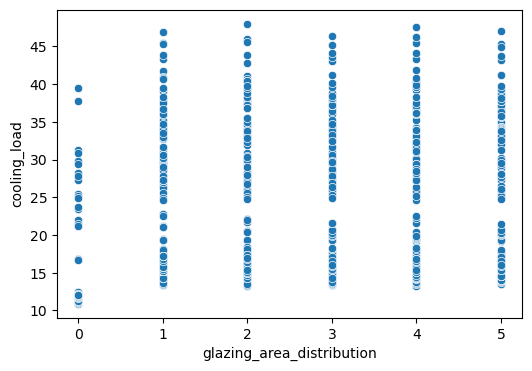

In [1986]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'relative_compactness', y = 'cooling_load', data = df)
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'surface_area', y = 'cooling_load', data = df)
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'wall_area', y = 'cooling_load', data = df)
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'roof_area', y = 'cooling_load', data = df)
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'overall_height', y = 'cooling_load', data = df)
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'orientation', y = 'cooling_load', data = df)
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'glazing_area', y = 'cooling_load', data = df)
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'glazing_area_distribution', y = 'cooling_load', data = df)
plt.show()

In [1988]:
#Let's look at the correlation between all of the 10 variables from X1 to Y2 
#in order to see how it differs

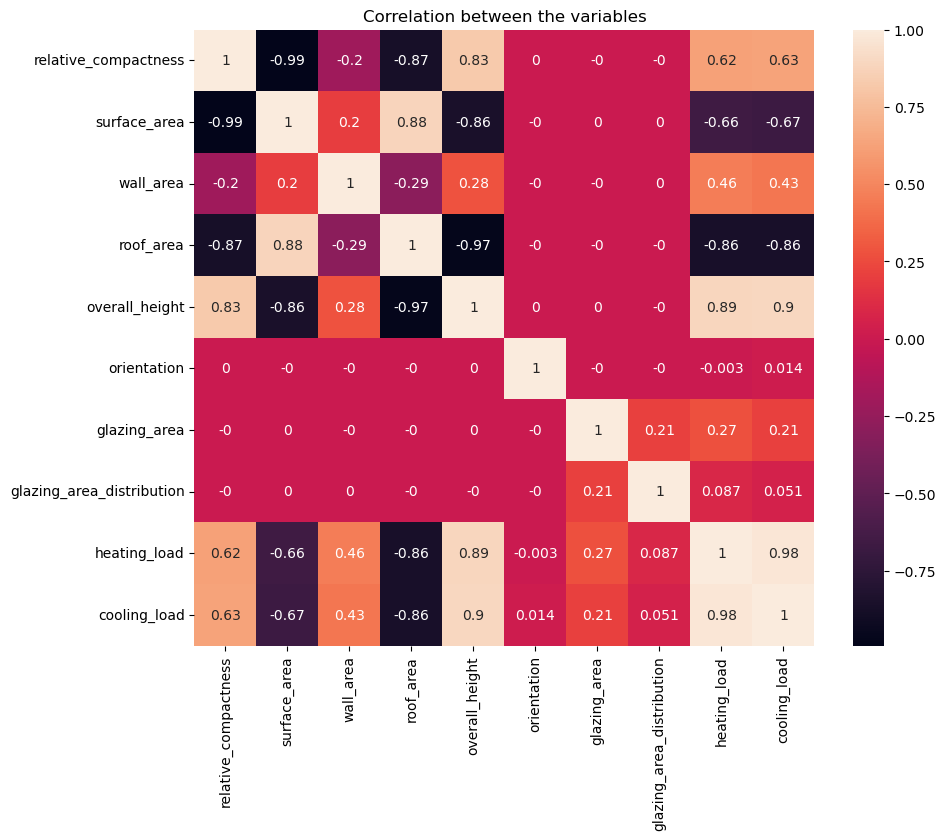

In [35]:
#Looking at the correlation between the variables within the dataset
plt.figure(figsize = (10,8))
sns.heatmap(df[['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']].corr().round(3), annot = True)
plt.title('Correlation between the variables')
plt.show()

#High correlation between the target variables heating load and cooling load

# Model selection and evaluation

In [37]:
#Let's look at the columns again for model selection and evaluation
df.head(10)

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


## Model selection

In [1996]:
#For this regression problem, the models that have been chosen are 
#linnear regression, and support vector machines, because of their provided understanding
#when it comes to if I want to look after the relationships of the features 
#(before renaming, X1-X8) and the targets (before renaming, Y1-Y2).

## Training the selected regression models

In [39]:
#Importing the train test split technique from Scikit-learn
#to split the dataset into training set and test set
from sklearn.model_selection import train_test_split

In [41]:
#In this case, X is all the columns from column 1-8, and y is the last one
X = df.iloc[:,0:8]    

#In this case, y is the target variables and only target variables selected
y = df.iloc[:,8:10]    

In [43]:
#Show that the features and targets have been separated from each other in X and y.
print(X.columns)
print(y.columns)

Index(['relative_compactness', 'surface_area', 'wall_area', 'roof_area',
       'overall_height', 'orientation', 'glazing_area',
       'glazing_area_distribution'],
      dtype='object')
Index(['heating_load', 'cooling_load'], dtype='object')


In [45]:
#Train and test splitting the dataset, where the training size is 0.8, 
#and this will lead to the test size be at 0.2 when it comes to predicting the models
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 30)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614, 2)
(154, 2)


In [49]:
X_train.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution
count,614.00000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.76456,671.515472,317.223127,177.146173,5.232899,3.498371,0.233795,2.780130
std,0.10674,88.697702,42.611775,45.088337,1.751343,1.129104,0.133934,1.559749
min,0.62000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000
25%,0.66000,612.500000,294.000000,147.000000,3.500000,2.000000,0.100000,1.000000
50%,0.74000,686.000000,318.500000,220.500000,3.500000,4.000000,0.250000,3.000000
75%,0.82000,759.500000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000
max,0.98000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000


In [51]:
X_test.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.762597,672.477273,323.590909,174.443182,5.318182,3.506494,0.236688,2.941558
std,0.102171,85.883363,47.261802,45.557463,1.754377,1.080104,0.130740,1.513499
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000
25%,0.690000,588.000000,294.000000,122.500000,3.500000,3.000000,0.100000,2.000000
50%,0.760000,661.500000,318.500000,147.000000,7.000000,3.000000,0.250000,3.000000
75%,0.860000,735.000000,343.000000,220.500000,7.000000,4.000000,0.400000,4.000000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000


In [53]:
y_train.describe()

,heating_load,cooling_load
count,614.000000,614.000000
mean,22.116752,24.473941
std,10.034708,9.531354
min,6.010000,10.900000
25%,13.000000,15.575000
50%,18.595000,21.700000
75%,29.980000,32.950000
max,42.960000,48.030000


In [55]:
y_test.describe()

,heating_load,cooling_load
count,154.000000,154.000000
mean,23.066494,25.041558
std,10.306625,9.458228
min,7.100000,12.040000
25%,12.930000,15.792500
50%,23.755000,25.075000
75%,32.285000,33.215000
max,43.100000,45.520000


In [2016]:
#Before implementing the models, let's scale the dataset with Standard Scaler since
#this scaler is better for regression problems and when the data is distributed normally
#and since I want to use the models linear regression and support vector machines, this scaler
#is seen as suitable

In [57]:
#Importing the standard scaler
from sklearn.preprocessing import StandardScaler

In [59]:
stanscal = StandardScaler()

In [61]:
X_train = stanscal.fit_transform(X_train)

In [63]:
X_test = stanscal.transform(X_test)

### Model 1: Linear regression

In [65]:
#importing the necessary model from the Sci-kit learn library
from sklearn.linear_model import LinearRegression

In [67]:
#Creating the linear regression model
LR = LinearRegression() 

In [69]:
LR.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred_LR = LR.predict(X_test)

In [73]:
print(y_pred_LR.shape)

(154, 2)


In [75]:
#Now I will look what the score for the model's performance is based on the test set 
print(f'The score for the regression model is:\n{LR.score(X_test, y_test)}')

The score for the regression model is:
0.9155590980746738


In [77]:
#Importing different needed metrics such as mean absolute error, mean squared error, and R^2
#which in this case is suitable because of the continous variables that exist within the dataset
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [79]:
#Accessing the model's performance through evaluating with different metrics
def show_values_of_metrics_LR():
    print('Metric values for the Linear Regression model: \n')
    print(f'- Mean Absolute Error is: {mean_absolute_error(y_test, y_pred_LR)}')
    print(f'- Mean Squared Error is: {mean_squared_error(y_test, y_pred_LR)}')
    print(f'- R2 Score is: {r2_score(y_test, y_pred_LR)}')

show_values_of_metrics_LR()

Metric values for the Linear Regression model: 

- Mean Absolute Error is: 1.980479954659825
- Mean Squared Error is: 8.098905203462015
- R2 Score is: 0.9155590980746738


## Visualizing the linear regression model

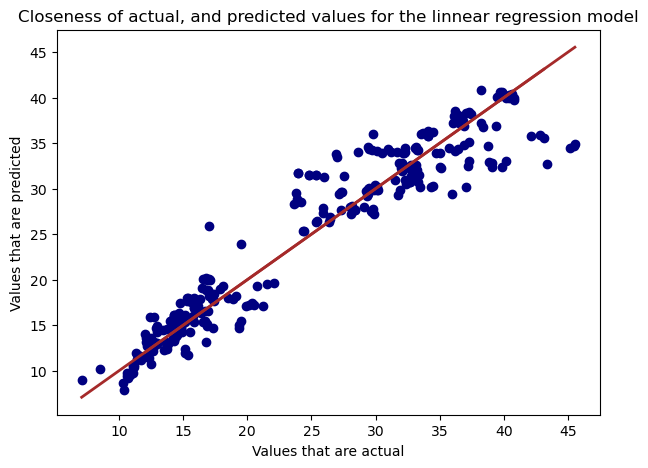

In [81]:
#Visualizing the closeness between the values that were predicted, and the actual kinds of values.
plt.figure(figsize = (7,5))
plt.scatter(y_test, y_pred_LR, color = 'navy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="brown", linewidth=2)
plt.xlabel('Values that are actual')
plt.ylabel('Values that are predicted')
plt.title('Closeness of actual, and predicted values for the linnear regression model')
plt.show()

### Model 2: Support Vector Machines

In [83]:
#Importing another model Support Vector Machines
from sklearn.svm import SVR

In [85]:
#Creating the SVM model
svecm = SVR() 

In [87]:
#Fitting the model with the trained data
svecm.fit(X_train, y_train['heating_load'])

SVR()

In [93]:
svecm.fit(X_train, y_train['cooling_load'])

SVR()

In [95]:
y_pred_SVR = svecm.predict(X_test)

In [97]:
print(y_pred_SVR.shape)

(154,)


In [103]:
#Now I will look what the score for the model's performance is based on the test set 
#In this case, heating load
print(f'The score for the SVR model is:\n{svecm.score(X_test, y_test['heating_load'])}')

The score for the SVR model is:
0.9014415405060731


In [105]:
#Now I will look what the score for the model's performance is based on the test set
#In this case, cooling load
print(f'The score for the SVR model is:\n{svecm.score(X_test, y_test['cooling_load'])}')

The score for the SVR model is:
0.9078963099378482


In [107]:
#Accessing the model's performance through evaluating with different metrics
#for cooling load, and heating load, and both models

def show_values_of_metrics_svecm():
    print('Metric values for the SVR model regarding heating_load: \n')
    print(f'- Mean Absolute Error is: {mean_absolute_error(y_test['heating_load'], y_pred_SVR)}')
    print(f'- Mean Squared Error is: {mean_squared_error(y_test['heating_load'], y_pred_SVR)}')
    print(f'- Root Mean Squared Error is: {r2_score(y_test['heating_load'], y_pred_SVR)}\n')
    
    print('Metric values for the SVR model regarding cooling_load: \n')
    print(f'- Mean Absolute Error is: {mean_absolute_error(y_test['cooling_load'], y_pred_SVR)}')
    print(f'- Mean Squared Error is: {mean_squared_error(y_test['cooling_load'], y_pred_SVR)}')
    print(f'- Root Mean Squared Error is: {r2_score(y_test['cooling_load'], y_pred_SVR)}')

show_values_of_metrics_svecm() 

Metric values for the SVR model regarding heating_load: 

- Mean Absolute Error is: 2.559688681566479
- Mean Squared Error is: 10.401538736163475
- Root Mean Squared Error is: 0.9014415405060731

Metric values for the SVR model regarding cooling_load: 

- Mean Absolute Error is: 1.8097263809226207
- Mean Squared Error is: 8.185916662544132
- Root Mean Squared Error is: 0.9078963099378482


## Comparing the models' scores (Overview)

In [109]:
#Comparing the models' metrics and see which model has better performance or higher score
print(f'The score for the regression model is:\n{LR.score(X_test, y_test)}\n')
print(f'The score for the SVR model for heating_load is:\n{svecm.score(X_test, y_test['heating_load'])}\n')
print(f'The score for the SVR model for cooling_load is:\n{svecm.score(X_test, y_test['cooling_load'])}')

The score for the regression model is:
0.9155590980746738

The score for the SVR model for heating_load is:
0.9014415405060731

The score for the SVR model for cooling_load is:
0.9078963099378482


In [2072]:
#Both models perform good, however, the regression model performs a little bit better 
#based on the scores. Additionally, there are techniques that can make the models improved
#such as gradient boosting or random forests.

# Neural network integration

In [112]:
#Importing the necessary library Tensorflow for neural networks
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score

The chosen network architecture in this regression analysis that was seen as suitable was ANN (Artificial Neural) that is feedforward, mainly because of the problem that is characterized as a regression problem, and also that the the dataset is small with 768 rows and 8 columns. Additionally, the choice of neural network was also based on the dataset that had values that were continous.

In [115]:
seqmodel = Sequential()

### Creating layers of the neural network

In [117]:
#Now the model is being build in this phase with the input layer, dense layers, and output layer
seqmodel.add(Input(shape = (X_train.shape[1],))),
seqmodel.add(Dense(64, activation = 'relu')),
seqmodel.add(Dense(2, activation = 'linear'))

In [119]:
#Overview over the summary of the model that has been build
seqmodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 706 (2.76 KB)

 Trainable params: 706 (2.76 KB)

 Non-trainable params: 0 (0.00 B)

### Implementing and training the chosen neural network

In [158]:
#Compiling the model before fitting the model and training the model
seqmodel.compile(
                    optimizer = 'adam',
                    loss = 'mean_absolute_error',
                    metrics = ['r2_score']
                )

In [123]:
#Fitting the model
seqmodel.fit(X_train, y_train, batch_size = 64, epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 23.9766 - r2_score: -6.1693
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.1713 - r2_score: -5.4759
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 22.7606 - r2_score: -5.5022
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.3856 - r2_score: -5.7201
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.1241 - r2_score: -5.2623
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.4205 - r2_score: -5.1427
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.7641 - r2_score: -4.8015
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.1415 - r2_score: -4.6602
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.1686 - r2_score: -4.6777
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.7887 - r2_score: -4.6292
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.2986 - r2_score: -4.0235
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 

In [125]:
#Evaluating the test data for the model
seqmodel.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9298 - r2_score: 0.9046


[1.8772188425064087, 0.9019594192504883]

In [127]:
y_pred_nene = seqmodel.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


## Comparing the scores from using the metrics with regression models versus the neural network

In [155]:
#Comparing neural network's performance with linnear regression and SVR
#Mean Absolute Error:
def view_values_mae():
    print(f'Mean Absolute Error: ')
    print(f'Linnear Regression: {mean_absolute_error(y_test, y_pred_LR)}')
    print(f'SVR (heating_load): {mean_absolute_error(y_test['heating_load'], y_pred_SVR)}')
    print(f'SVR (cooling_load): {mean_absolute_error(y_test['cooling_load'], y_pred_SVR)}')
    print(f'Neural Network: {mean_absolute_error(y_test, y_pred_nene)}\n')

#Mean Squared Error
def view_values_mse():
    print(f'Mean Squared Error: ')
    print(f'Linnear regression: {mean_squared_error(y_test, y_pred_LR)}')
    print(f'SVR (heating_load): {mean_squared_error(y_test['heating_load'], y_pred_SVR)}')
    print(f'SVR (cooling_load): {mean_squared_error(y_test['cooling_load'], y_pred_SVR)}')
    print(f'Neural Network: {mean_squared_error(y_test, y_pred_nene)}\n')

#R^2
def view_values_r2():
    print(f'R2: ')
    print(f'Linnear regression: {r2_score(y_test, y_pred_LR)}')
    print(f'SVR (heating_load): {r2_score(y_test['heating_load'], y_pred_SVR)}')
    print(f'SVR (cooling_load): {r2_score(y_test['cooling_load'], y_pred_SVR)}')
    print(f'Neural Network: {r2_score(y_test, y_pred_nene)}')

view_values_mae()
view_values_mse()
view_values_r2()

Mean Absolute Error: 
Linnear Regression: 1.980479954659825
SVR (heating_load): 2.559688681566479
SVR (cooling_load): 1.8097263809226207
Neural Network: 1.8772188465316575

Mean Squared Error: 
Linnear regression: 8.098905203462015
SVR (heating_load): 10.401538736163475
SVR (cooling_load): 8.185916662544132
Neural Network: 9.365084090688264

R2: 
Linnear regression: 0.9155590980746738
SVR (heating_load): 0.9014415405060731
SVR (cooling_load): 0.9078963099378482
Neural Network: 0.9019593995077739


# Conclusions

Out of the performance of the metrics from the models, comparing the traditional models Linnear Regression (LR) and Support Vector Machines (SVR) with each other, the one that performed better of all for MAE was SVR with 1.81 while the neural network had 1.87 when fitted, for MSE was Linnear Regression with 8.09 compared to SVR which had a high error of 10.40, and the neural network with 9.37. Regarding for R2, Linnear Regression had a result of 0.92, while the neural network had 0.90 when fitted. Lastly, it can be said that the Linnear Regression model was the model that performed best and had a strong and higher performance with the neural network and SVR having close scores. This can be concluded that it is a good choice of model for observations in the future based on the r2 score. When the focus is aimed at the MAE, the SVR model would be more preferable as the model had a low MAE of 1.80, while if the focus is on the MSE, again, linnear regression would be preferable as it had a low MSE with 8.10. In connection with the neural network's performance and result, the result can be higher if hyperparamter tuning would be utilized and applied on the neural network. 